In [1]:
# Basic tools
import pandas as pd
import numpy as np
import math
from collections import Counter
import datetime

# Web scraping and cleaning
import re
import json
import requests
from bs4 import BeautifulSoup

# Graph
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reuse functions from another file
import os
import sys
PROJ_ROOT = os.path.join(os.pardir, os.pardir)
## add the 'Springboard' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, "Springboard")
sys.path.append(src_dir)

# 0. Data loading

In [85]:
df = pd.read_csv('final_pre.csv')

# 1. Load functions

In [3]:
from Function.module import *

# [IMDB]


**Hypothesis testing with permutation and bootstrapping in correlation**


P-value is lower than 0.05: True


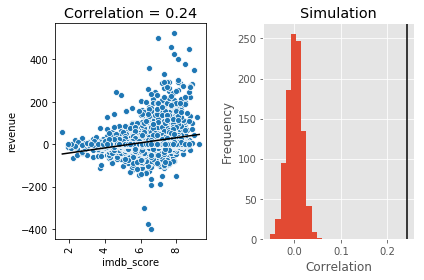

In [4]:
pearson_permutation_plot(df, 'imdb_score','revenue', 1000)

# [gross and buget]

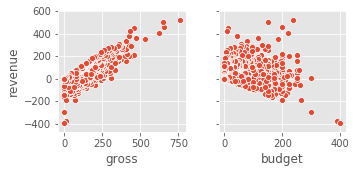

In [57]:
gross_budget = ['gross', 'budget']
sns.pairplot(df, y_vars='revenue', x_vars=gross_budget)

**Hypothesis testing with permutation and bootstrapping in correlation**


P-value is lower than 0.05: False


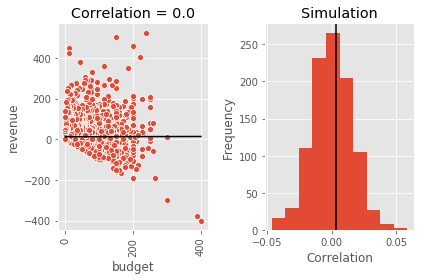

In [86]:
pearson_permutation_plot(df, 'budget', 'revenue', 1000)

P-value is lower than 0.05: False


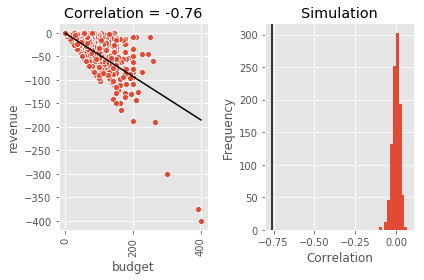

In [87]:
negative_rev = df[df.revenue < 0]
pearson_permutation_plot(negative_rev, 'budget', 'revenue', 1000)

P-value is lower than 0.05: True


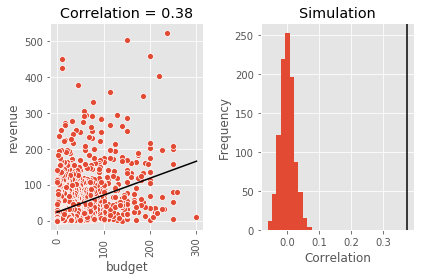

In [88]:
positive_rev = df[df.revenue > 0]
pearson_permutation_plot(positive_rev, 'budget', 'revenue', 1000)

# [Directors and actors name frequency]

In [5]:
director_actor_name = ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']

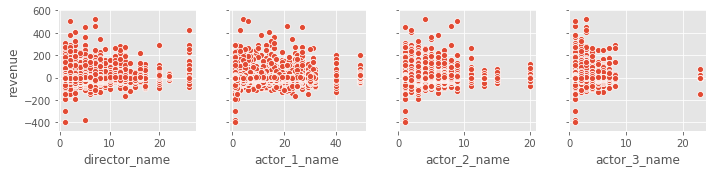

In [6]:
sns.pairplot(df, y_vars='revenue', x_vars=director_actor_name)

# [Facebook_like]

In [7]:
fb_like = ['director_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes']

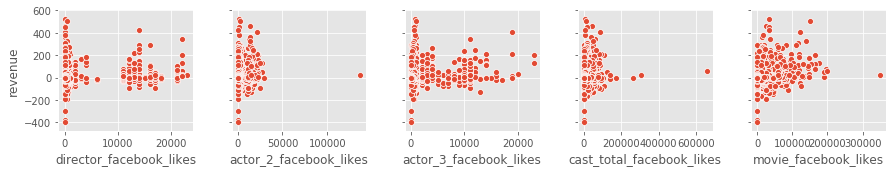

In [8]:
sns.pairplot(df, y_vars='revenue', x_vars=fb_like)

In [89]:
# outliers in actor_2 fb likes
df = df.drop(df[df.actor_2_facebook_likes == max(df.actor_2_facebook_likes)].index)

In [90]:
# outliers in movie fb likes
df = df.drop(df[df.movie_facebook_likes == max(df.movie_facebook_likes)].index)

In [91]:
# outliers in cast total fb likes
df = df.drop(df[df.cast_total_facebook_likes == max(df.cast_total_facebook_likes)].index)

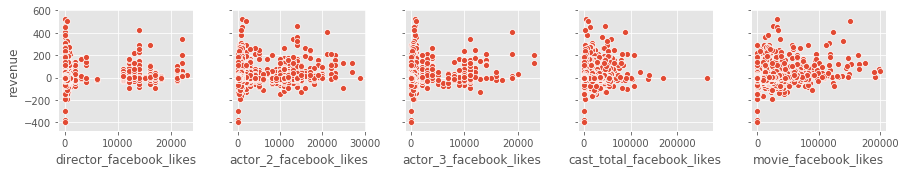

In [12]:
# check it again
sns.pairplot(df, y_vars='revenue', x_vars=fb_like)

In [92]:
# still has outlier in cast total fb likes
df = df.drop(df[df.cast_total_facebook_likes > 200000].index)

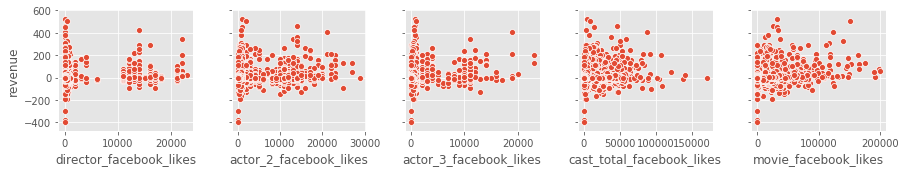

In [14]:
# check it again
sns.pairplot(df, y_vars='revenue', x_vars=fb_like)

**Hypothesis testing with permutation and bootstrapping in correlation**


P-value is lower than 0.05: True


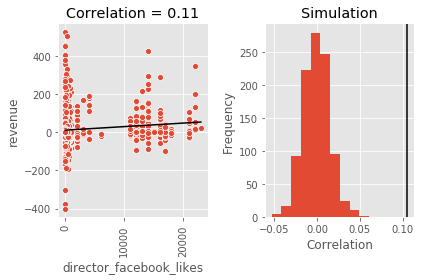

In [72]:
pearson_permutation_plot(df, 'director_facebook_likes', 'revenue', 1000)

P-value is lower than 0.05: True


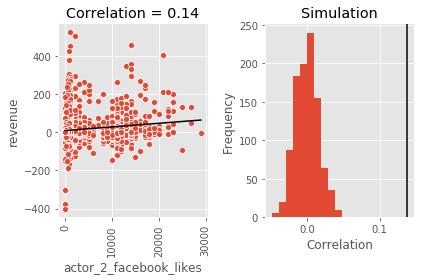

In [73]:
pearson_permutation_plot(df, 'actor_2_facebook_likes', 'revenue', 1000)

P-value is lower than 0.05: True


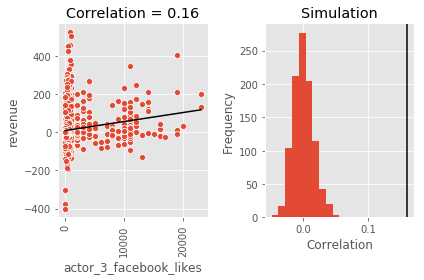

In [74]:
pearson_permutation_plot(df, 'actor_3_facebook_likes', 'revenue', 1000)

P-value is lower than 0.05: True


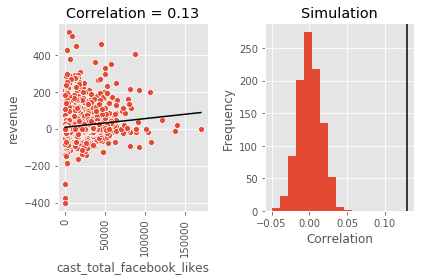

In [75]:
pearson_permutation_plot(df, 'cast_total_facebook_likes', 'revenue', 1000)

P-value is lower than 0.05: True


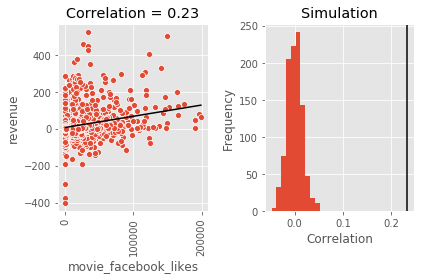

In [76]:
pearson_permutation_plot(df, 'movie_facebook_likes', 'revenue', 1000)

# [critics and voted_users]

In [15]:
critic_user = ['num_user_for_reviews', 'num_critic_for_reviews', 'num_voted_users']

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.]),
 <a list of 6 Text xticklabel objects>)

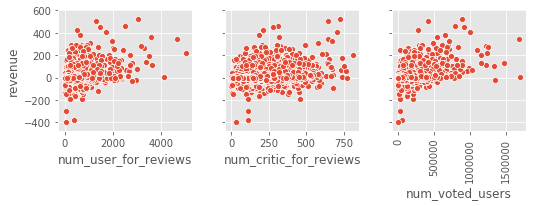

In [16]:
sns.pairplot(y_vars='revenue', x_vars=critic_user, data=df)
plt.xticks(rotation=90)

**Hypothesis testing with permutation and bootstrapping in correlation**


**number user for reviews**

P-value is lower than 0.05: True


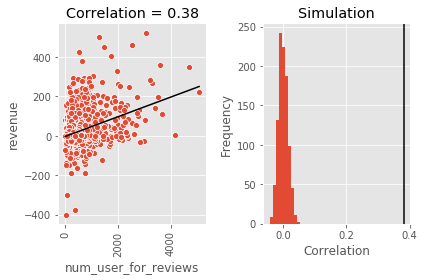

In [17]:
pearson_permutation_plot(df, 'num_user_for_reviews', 'revenue', 1000)

**number critic for reviews**

P-value is lower than 0.05: True


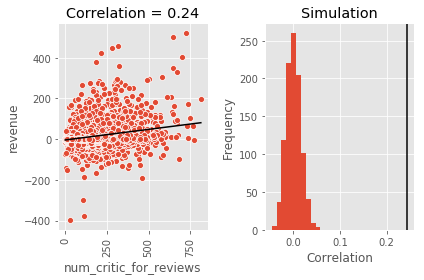

In [18]:
pearson_permutation_plot(df, 'num_critic_for_reviews', 'revenue', 1000)

**number voted users**

P-value is lower than 0.05: True


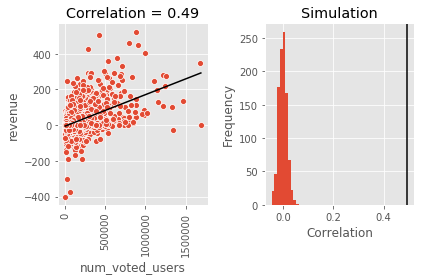

In [19]:
pearson_permutation_plot(df, 'num_voted_users', 'revenue', 1000)

# [others]

In [20]:
other = ['duration', 'aspect_ratio', 'facenumber_in_poster']

(array([-20.,   0.,  20.,  40.,  60.]), <a list of 5 Text xticklabel objects>)

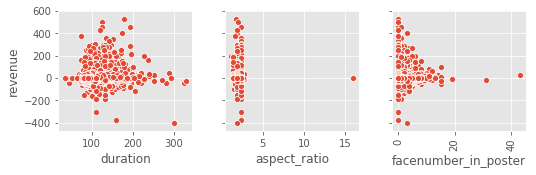

In [21]:
sns.pairplot(y_vars='revenue', x_vars=other, data=df)
plt.xticks(rotation=90)

In [93]:
# outlier in aspect_ratio
df = df.drop(df[df['aspect_ratio'] > 15].index)

In [94]:
# outlier in face number
df = df.drop(df[df['facenumber_in_poster'] > 20].index)

(array([-10.,   0.,  10.,  20.]), <a list of 4 Text xticklabel objects>)

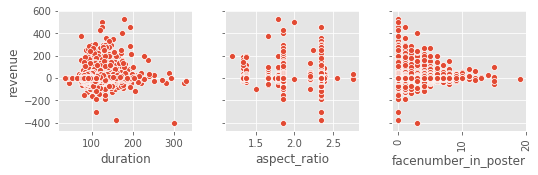

In [24]:
sns.pairplot(y_vars='revenue', x_vars=other, data=df)
plt.xticks(rotation=90)

**Hypothesis testing with permutation and bootstrapping in correlation**

P-value is lower than 0.05: True


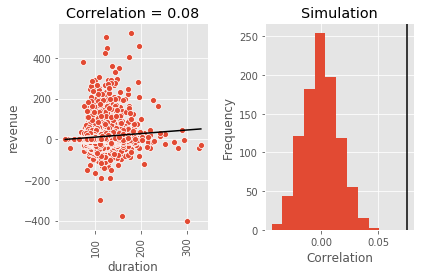

In [25]:
pearson_permutation_plot(df, 'duration', 'revenue', 1000)

P-value is lower than 0.05: False


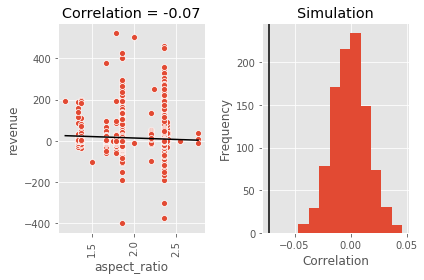

In [26]:
pearson_permutation_plot(df, 'aspect_ratio', 'revenue', 1000)

P-value is lower than 0.05: False


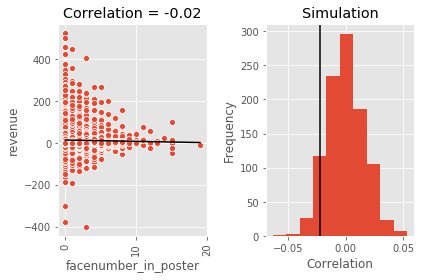

In [27]:
pearson_permutation_plot(df, 'facenumber_in_poster', 'revenue', 1000)

# [movie informaiton]

In [28]:
information = ['color', 'language', 'country']

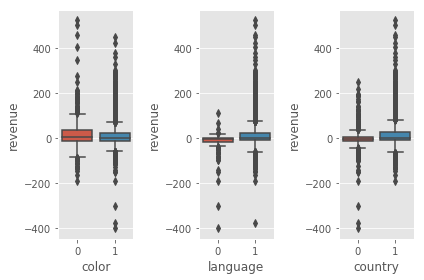

In [29]:
for i in information:
    plt.subplot(1, len(information), (information.index(i)+1))
    sns.boxplot(x=i, y='revenue', data=df)
plt.tight_layout()

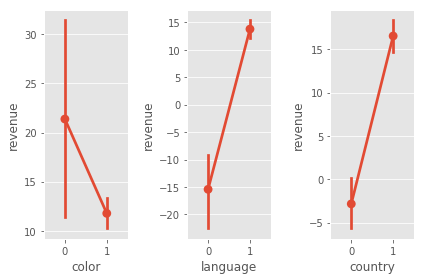

In [30]:
for i in information:
    plt.subplot(1, len(information), (information.index(i)+1))
    sns.pointplot(x=i, y='revenue', data=df)
plt.tight_layout()

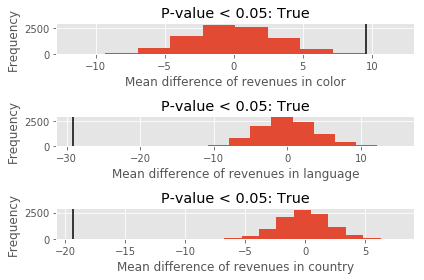

In [31]:
for i in information:
    plt.subplot(len(information), 1, (information.index(i)+1))
    mean_diff_testing(df, i, 'revenue', 10000)
plt.tight_layout()

# [time]

In [32]:
time = ['month', 'title_year']

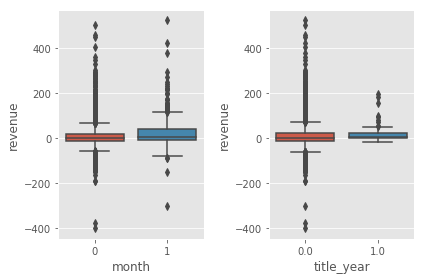

In [33]:
for i in time:
    plt.subplot(1, len(time), (time.index(i)+1))
    sns.boxplot(x=i, y='revenue', data=df)
plt.tight_layout()

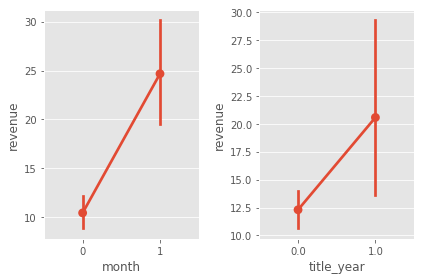

In [99]:
for i in time:
    plt.subplot(1, len(time), (time.index(i)+1))
    sns.pointplot(x=i, y='revenue', data=df)
plt.tight_layout()

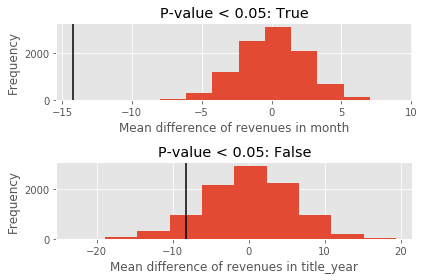

In [83]:
for i in time:
    plt.subplot(len(time), 1, (time.index(i)+1))
    mean_diff_testing(df, i, 'revenue', 10000)
plt.tight_layout()

# [genres]

In [95]:
# remove two empty columns
df = df.drop(columns=['Game-Show','Reality-TV'])

In [37]:
# make a list of genres
genres = list(df.columns[23:50])

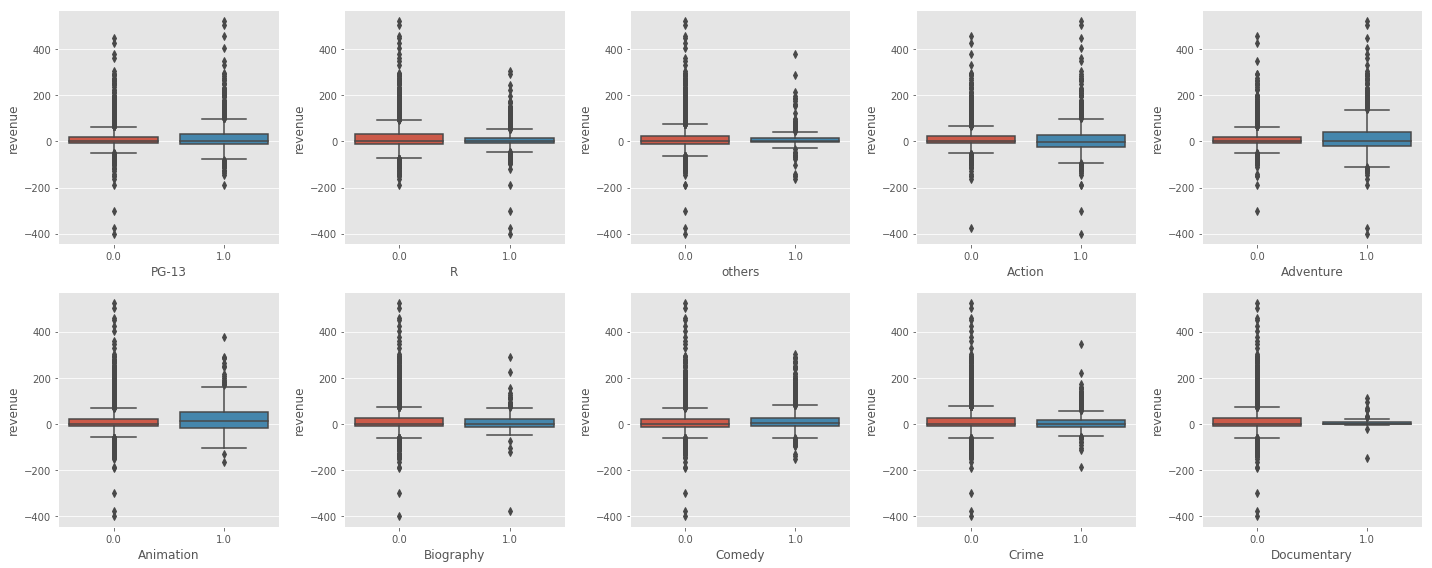

In [38]:
plt.figure(figsize=(20, 8))
for i in genres[0:10]:
    plt.subplot(2, 5, (genres.index(i)+1))
    sns.boxplot(x=i, y='revenue', data=df)
plt.tight_layout()

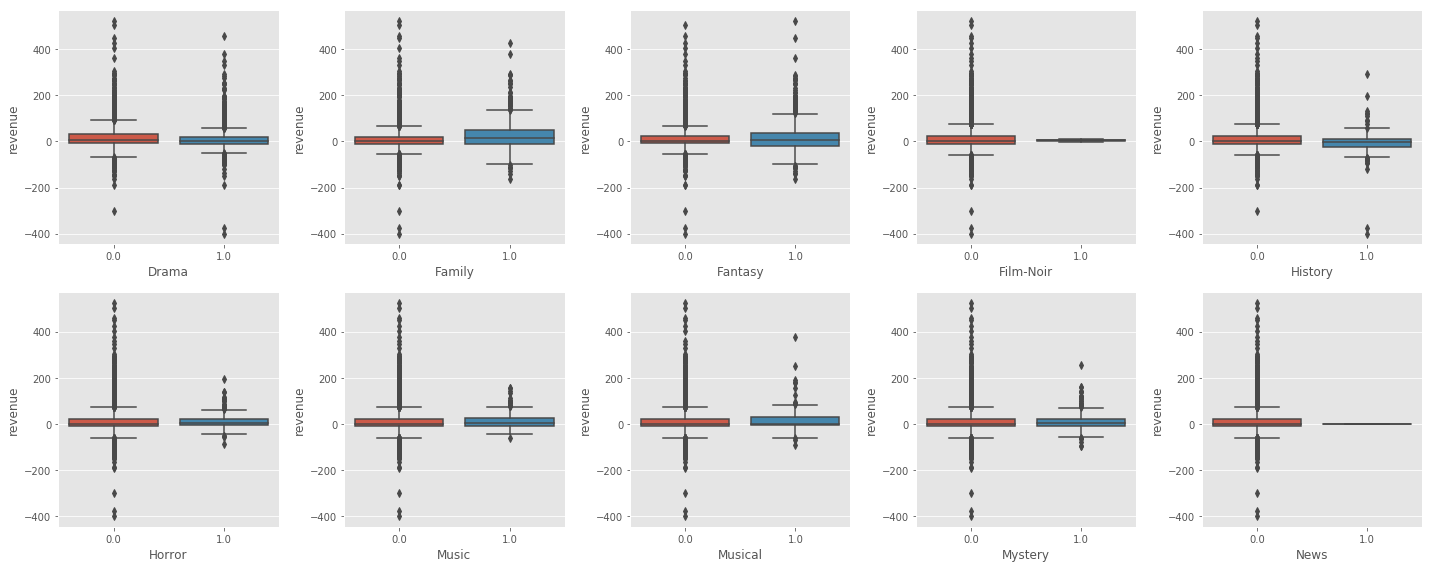

In [40]:
plt.figure(figsize=(20, 8))
for i in genres[10:20]:
    plt.subplot(2, 5, (genres[10:20].index(i)+1))
    sns.boxplot(x=i, y='revenue', data=df)
plt.tight_layout()

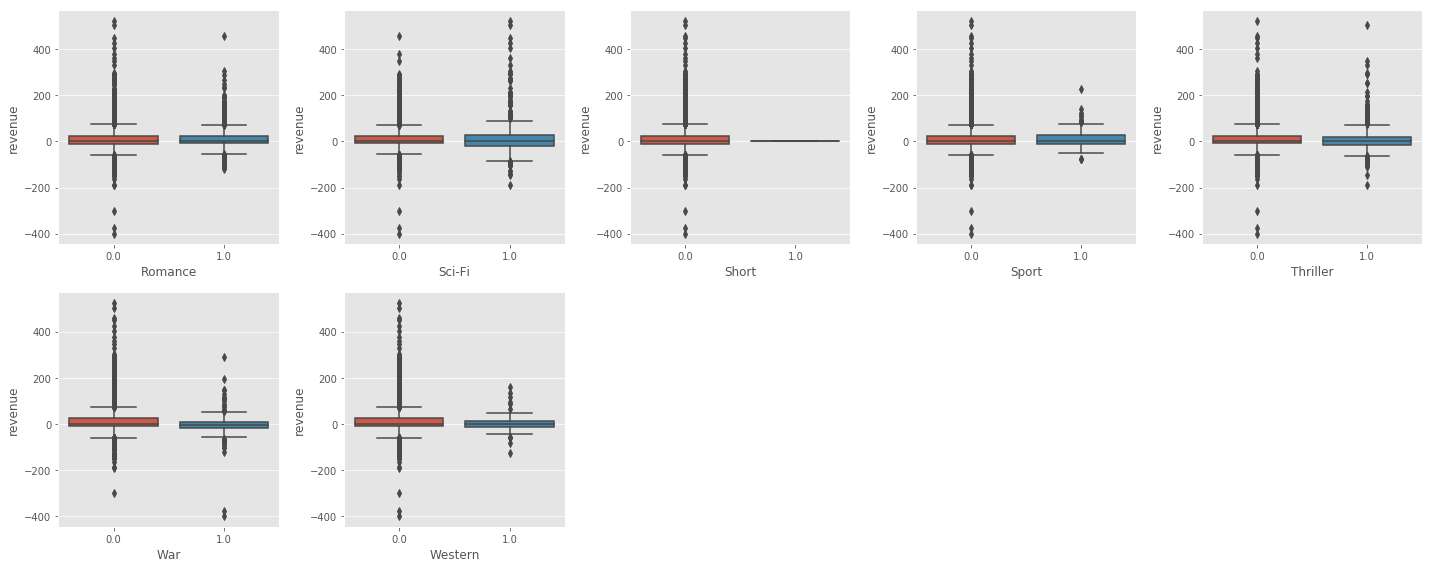

In [41]:
plt.figure(figsize=(20, 8))
for i in genres[20:]:
    plt.subplot(2, 5, (genres[20:].index(i)+1))
    sns.boxplot(x=i, y='revenue', data=df)
plt.tight_layout()

In [96]:
# remove skewed columns
df = df.drop(columns=['Short','News', 'Film-Noir', 'Documentary'])

In [43]:
# remake a list of genres
genres = list(df.columns[23:46])

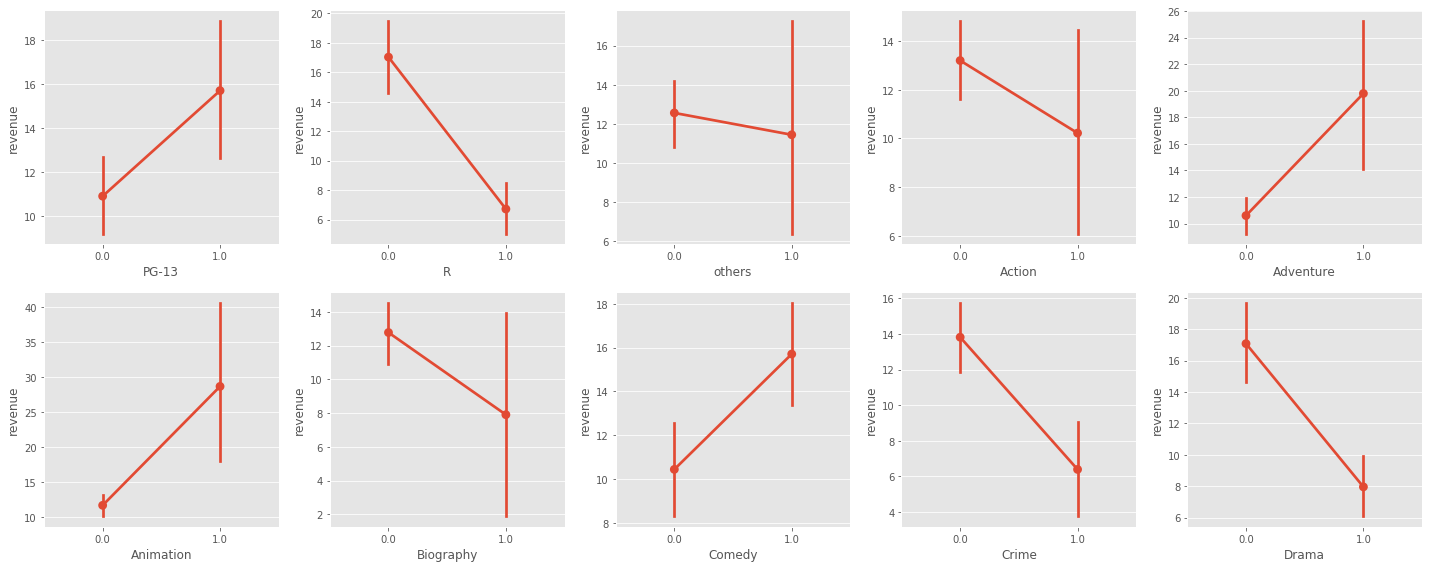

In [44]:
plt.figure(figsize=(20, 8))
for i in genres[0:10]:
    plt.subplot(2, 5, (genres.index(i)+1))
    sns.pointplot(x=i, y='revenue', data=df)
plt.tight_layout()

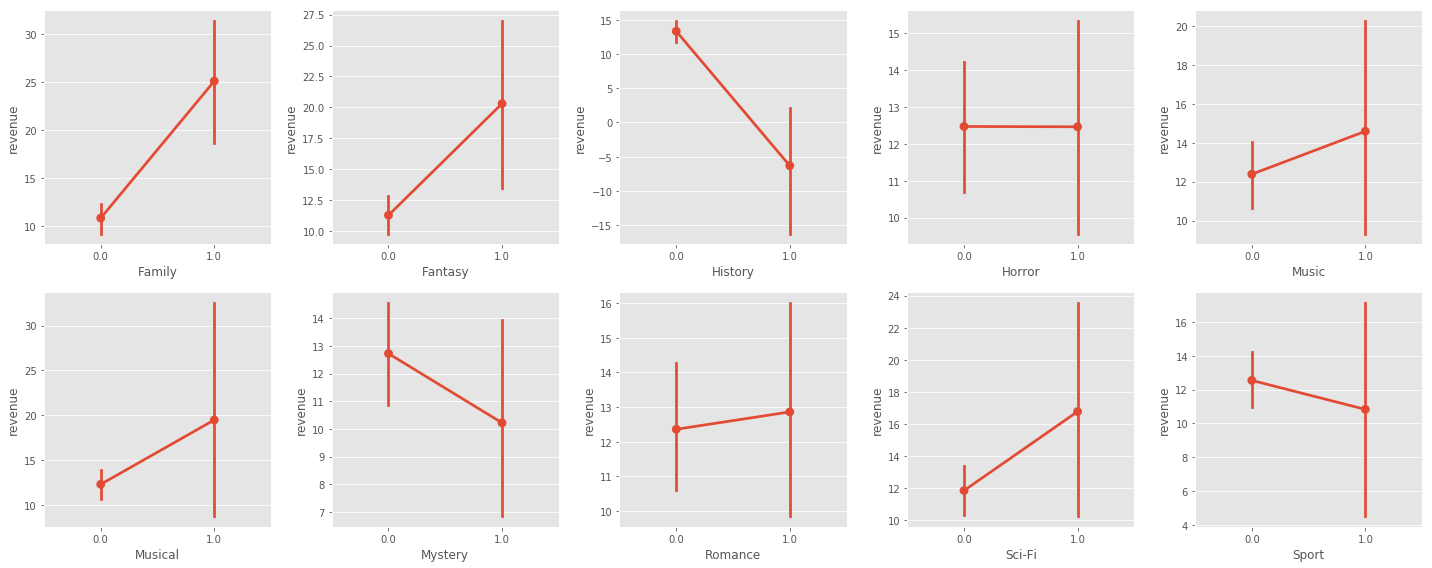

In [45]:
plt.figure(figsize=(20, 8))
for i in genres[10:20]:
    plt.subplot(2, 5, (genres[10:20].index(i)+1))
    sns.pointplot(x=i, y='revenue', data=df)
plt.tight_layout()

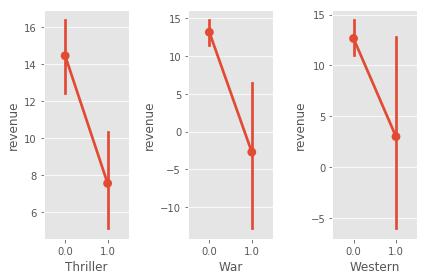

In [46]:
plt.figure(figsize=(10, 4))
for i in genres[20:]:
    plt.subplot(1, 5, (genres[20:].index(i)+1))
    sns.pointplot(x=i, y='revenue', data=df)
plt.tight_layout()

In [50]:
for i in genres:
    p = mean_diff_p(df, i, 'revenue', 10000)
    if p < 0.05:
        print (i + ': ' + str(p))

PG-13: 0.0067
R: 0.0
Adventure: 0.0
Animation: 0.0001
Comedy: 0.0018
Crime: 0.0003
Drama: 0.0
Family: 0.0
Fantasy: 0.0002
History: 0.0
Sci-Fi: 0.0453
Thriller: 0.0
War: 0.0002


# 3. Save the file after EDA

In [97]:
# gross and budget are related to our target so I remove it to avoid the leaking effect in machine learning
df = df.drop(columns=['gross', 'budget'])

# remove an extra column
df = df.drop(columns='Unnamed: 0')

In [81]:
# save it
df.to_csv('final_eda.csv')